In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
Movie_data = pd.read_csv('Movie-Ratings.csv')

In [7]:
Movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
Movie_data.columns = ['Film','Genre','CriticRatings','AudienceRatings','BudgetinMM','ReleaseYear']

In [9]:
Movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null object
Genre              559 non-null object
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetinMM         559 non-null int64
ReleaseYear        559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [11]:
Movie_data.Film = Movie_data.Film.astype('category')
Movie_data.Genre = Movie_data.Genre.astype('category')
Movie_data.ReleaseYear = Movie_data.ReleaseYear.astype('category')

In [12]:
Movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film               559 non-null category
Genre              559 non-null category
CriticRatings      559 non-null int64
AudienceRatings    559 non-null int64
BudgetinMM         559 non-null int64
ReleaseYear        559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [13]:
Movie_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRatings,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRatings,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetinMM,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


In [15]:
# creating dashboard using violin plots, facet grid, 
#kde plots, box plots

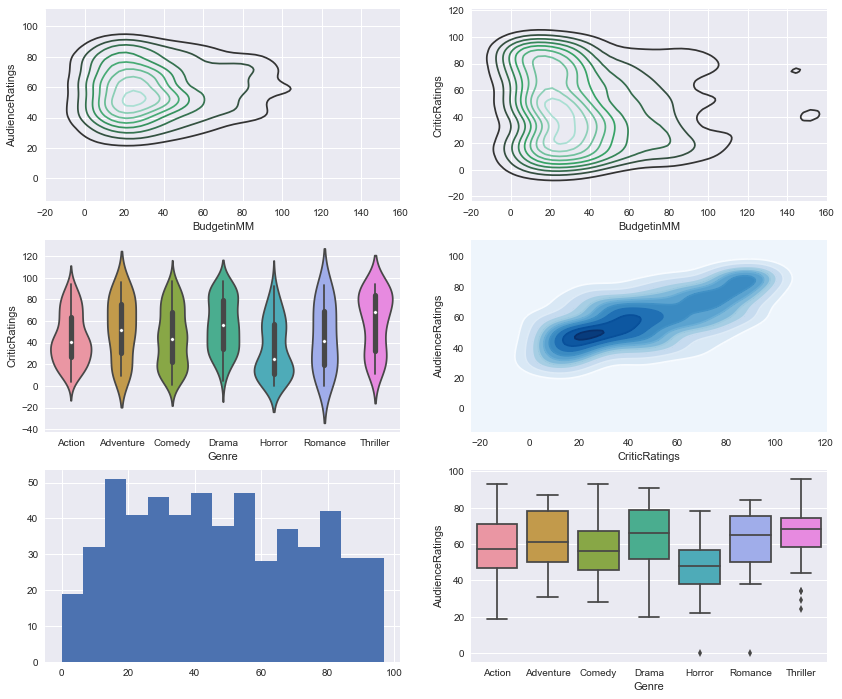

In [29]:
sns.set_style('darkgrid')
f, ax = plt.subplots(3,2, figsize = (14,12))
#comparision between Audience ratings and Budget
kde1 = sns.kdeplot(Movie_data.BudgetinMM,Movie_data.AudienceRatings,ax = ax[0,0])
kde1.set(xlim=(-20,160))
# similar comparision between Critic ratings and Budget
kde2 = sns.kdeplot(Movie_data.BudgetinMM,Movie_data.CriticRatings,ax = ax[0,1])
kde2.set(xlim=(-20,160))
#violin plots
vrt=sns.violinplot(y='CriticRatings', x= 'Genre', hue=None, data=Movie_data,ax = ax[1,0])
kde_plot = sns.kdeplot(Movie_data.CriticRatings,Movie_data.AudienceRatings
                      , shade = True, Shade_lowest =False,cmap = 'Blues',ax = ax[1,1])
kde_plot = sns.kdeplot(Movie_data.CriticRatings,Movie_data.AudienceRatings
                      ,cmap = 'Blues',ax = ax[1,1])
#including pyplot along with seaborn plots
hist = ax[2,0].hist(Movie_data.CriticRatings,bins = 15)
#box plots
b = sns.boxplot(y='AudienceRatings', x= 'Genre', hue=None, data=Movie_data, ax = ax[2,1])
